In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

inputfile =r'./weather2.xlsx'
data=pd.read_excel(inputfile)
daily_change=data['最高温']-data['最低温']
#增加年月维度
data['日期']=pd.to_datetime(data['日期'],errors='coerce')
data['年']=data['日期'].dt.year
data['月']=data['日期'].dt.month
#data['日']=data['日期'].dt.day

weather1=data.loc[:,['年','月','日期','天气状况','最高温','最低温']]
#每年的描述性统计
weather_year=weather1.groupby('年')
print(weather_year['最低温'].describe())
print(weather_year['最高温'].describe())

weather_year=weather1.groupby('月')
print(weather_year['最低温'].describe())
print(weather_year['最高温'].describe())
print(weather1)



      count       mean       std  min   25%   50%   75%   max
年                                                            
2011  365.0  15.216438  8.173581 -2.0   8.0  16.0  24.0  27.0
2012  366.0  15.524590  7.664771  1.0   9.0  16.0  22.0  28.0
2013  365.0  15.942466  8.035599  0.0   9.0  16.0  23.0  27.0
2014  365.0  15.794521  7.710345  0.0   9.0  16.0  23.0  27.0
2015  365.0  16.254795  7.160120  1.0  10.0  18.0  22.0  28.0
2016  365.0  16.854795  7.779111 -4.0  10.0  18.0  24.0  28.0
2017  365.0  16.742466  7.546521  2.0  10.0  18.0  24.0  28.0
2018  365.0  16.394521  7.534023 -1.0  11.0  17.0  24.0  27.0
2019  365.0  15.843836  7.170241  1.0   9.0  16.0  22.0  27.0
2020  366.0  16.281421  7.370064 -2.0  10.0  17.0  23.0  27.0
2021  365.0  16.104110  7.779595 -3.0  10.0  16.0  24.0  27.0
      count       mean       std  min   25%   50%   75%   max
年                                                            
2011  365.0  22.775342  8.294970  6.0  16.0  24.0  30.0  37.0
2012  36

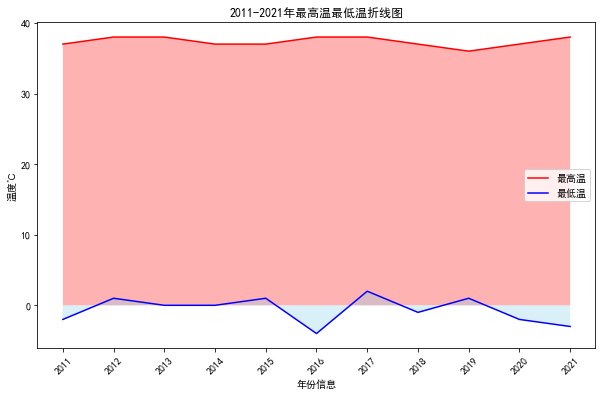

In [3]:
from matplotlib.pyplot import MultipleLocator
weather_year_month=weather1.groupby(['年','月']).agg({'最低温':np.min,'最高温':np.max}).reset_index()#某年某月最高温最低温
weather_year=weather_year_month.groupby(['年']).agg({'最低温':np.min,'最高温':np.max}).reset_index()
date=[]
Max=[]
Min=[]
for i in range(0,11):
    date.append(weather_year['年'][i])
    Max.append(weather_year['最高温'][i])
    Min.append(weather_year['最低温'][i])
plt.figure(figsize=(10,6))
plt.rcParams['font.sans-serif'] = ['SimHei']#显示中文
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("年份信息")
plt.ylabel("温度℃")
plt.xticks(rotation=45)
plt.title("2011-2021年最高温最低温折线图")
plt.fill_between(date,Max,facecolor='red',interpolate=True,alpha=0.3)#区域填充
plt.fill_between(date,Min,facecolor='skyblue',interpolate=True,alpha=0.3)#区域填充
plt.plot(date, Max, c='red',label = '最高温')
plt.plot(date, Min, c='blue',label = '最低温')
x = MultipleLocator(1)    # x轴每一个刻度
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.legend(loc='best')

d:\program files (x86)\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\program files (x86)\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\program files (x86)\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

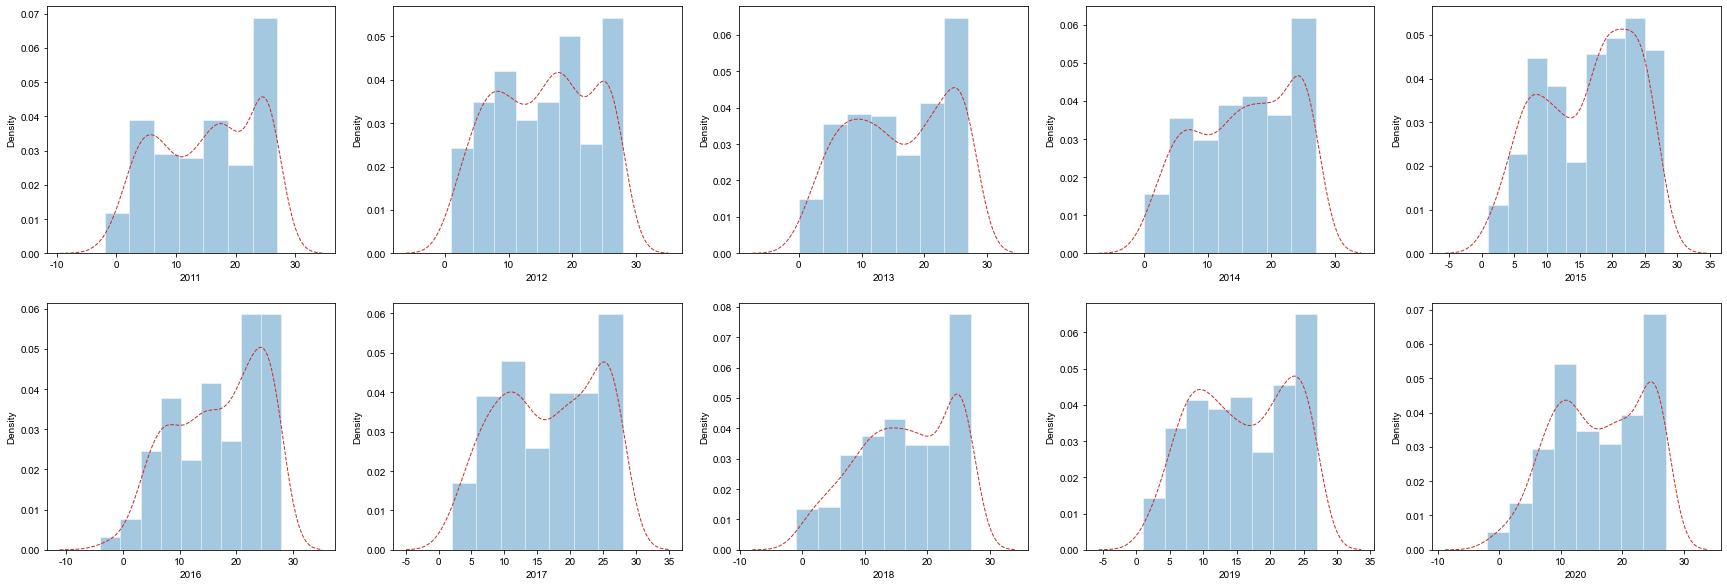

In [4]:
#再看下每年温度的分布情况
fig,axes=plt.subplots(2,5,figsize=(30,10))
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
sns.distplot(weather1[weather1.年==2011]['最低温'],kde=True,ax=axes[0,0],axlabel = r'2011',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2012]['最低温'],ax=axes[0,1],axlabel = r'2012',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2013]['最低温'],ax=axes[0,2],axlabel = r'2013',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2014]['最低温'],ax=axes[0,3],axlabel = r'2014',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2015]['最低温'],ax=axes[0,4],axlabel = r'2015',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2016]['最低温'],ax=axes[1,0],axlabel = r'2016',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2017]['最低温'],ax=axes[1,1],axlabel = r'2017',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2018]['最低温'],ax=axes[1,2],axlabel = r'2018',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2019]['最低温'],ax=axes[1,3],axlabel = r'2019',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
sns.distplot(weather1[weather1.年==2020]['最低温'],ax=axes[1,4],axlabel = r'2020',kde_kws={'linestyle':'--','linewidth':'1','color':'#c72e29'})
plt.show()

         年   月         日期 天气状况  最高温  最低温
0     2011   1 2011-01-01   多云    9    1
1     2011   1 2011-01-02   多云   11    4
2     2011   1 2011-01-03   多云   10    2
3     2011   1 2011-01-04   多云   10    5
4     2011   1 2011-01-05   小雨    7    3
...    ...  ..        ...  ...  ...  ...
4012  2021  12 2021-12-27   多云    7    1
4013  2021  12 2021-12-28   小雨    7    4
4014  2021  12 2021-12-29   多云   15    4
4015  2021  12 2021-12-30    晴   15    4
4016  2021  12 2021-12-31    晴   12    5

[4017 rows x 6 columns]


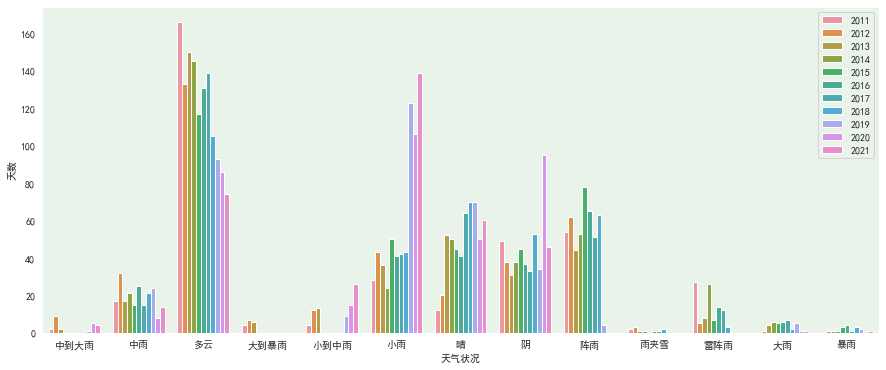

In [6]:
weather1['天气状况']=weather1['天气状况'].apply(lambda x:x.split('/')[0])
print(weather1)
weather2=weather1.groupby(['年','天气状况'])['日期'].count().reset_index().rename(columns={'日期':'天数'})
plt.figure(figsize=(15,6))
ax=sns.barplot(x='天气状况',y='天数',hue='年',data=weather2)
ax.legend(loc='upper right')
plt.show()